In [114]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import shape
import fiona
from shapely.ops import unary_union
import networkx as nx
import itertools
import osmnx as ox
import math
import momepy
import matplotlib.pyplot as plt
from shapely.geometry import Point
import io
import seaborn as sns

In [115]:
#!pip install seaborn

# Use LTS V 2.20 to validate the SF Network Connectivity. The below is the LTS criteria

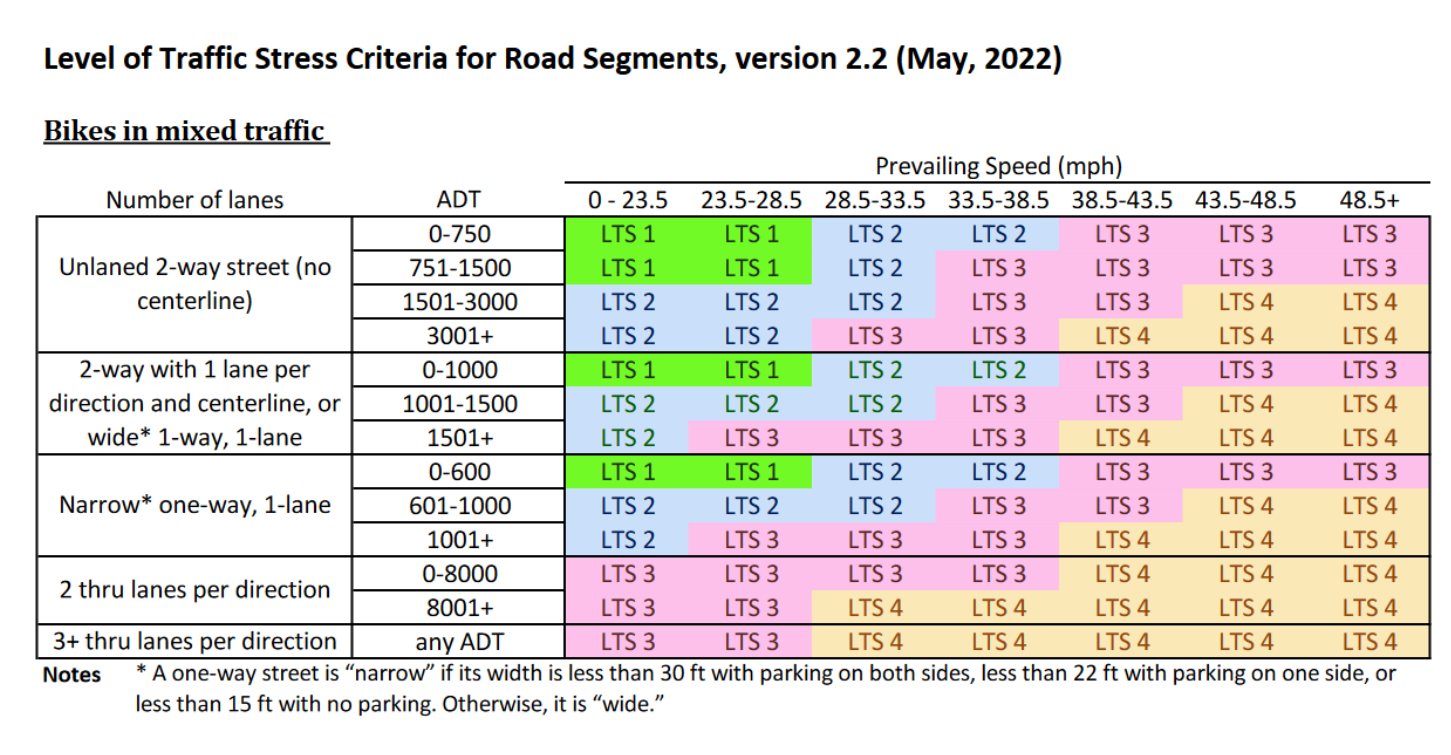

In [2]:
# Lets define LTS criteris for mixed traffic
# true=1, false=0, none=99
def LTS_mixed_traffic(AADT, Number_of_lanes, centerline,direction, speed):
    
    if ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT<751) and (speed<=28.5)):
        return 1
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT<751) and (speed>28.5) and (speed<=38.5)):
        return 2 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT<751) and (speed>38.5)):
        return 3 

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>750) and (AADT<1501) and (speed<=28.5)):
        return 1 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>750) and (AADT<1501) and (speed>28.5) and (speed<=33.5)):
        return 2 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>750) and (AADT<1501) and (speed>33.5)):
        return 3

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>1500) and (AADT<3001) and (speed<=33.5)):
        return 2 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>1500) and (AADT<3001) and (speed>33.5) and (speed<=43.5)):
        return 3
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>1500) and (AADT<3001) and (speed>43.5)):
        return 4

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>3000) and (speed<=28.5)):
        return 2
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>3000) and (speed>28.5) and (speed<=38.5)):
        return 3 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==2) and (AADT>3000) and (speed>38.5)):
        return 4 


    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT<1001) and (speed<=28.5)):
        return 1
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and  (AADT<1001) and (speed>28.5) and (speed<=38.5)):
        return 2
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT<1001) and (speed>38.5)):
        return 3

    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1000) and (AADT<=1500) and (speed<=33.5)):
        return 2
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1000) and (AADT<=1500) and (speed> 33.5) and (speed<=43.5)):
        return 3
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1000) and (AADT<=1500) and (speed> 43.5 )):
        return 4

    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1500)  and (speed<=23.5)):
        return 2  
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1500)  and (speed> 23.5) and (speed<=38.5)):
        return 3  
    elif ((Number_of_lanes==1) and (centerline==1) and (direction==2) and (AADT>1500)  and (speed>38.5)):
        return 4

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT<601)  and (speed<=28.5)):
        return 1  
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT<600)  and (speed>28.5) and (speed<=38.5)):
        return 2         
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT<600)  and (speed>38.5)):
        return 3

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>600)  and (AADT <=1000) and (speed<=33.5)):
        return 2  
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>600)  and (AADT <=1000) and (speed> 33.5) and (speed<=43.5)):
        return 3         
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>600)  and (AADT <=1000) and (speed> 43.5)):
        return 4 

    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>1000) and (speed<=23.5)):
        return 2          
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>1000) and speed>23.5 and (speed<= 38.5)):
        return 3 
    elif ((Number_of_lanes==1) and (centerline==0) and (direction==1) and (AADT>1000)  and (speed> 38.5)):
        return 4

    elif ((Number_of_lanes==2)  and (centerline==1)  and (direction==2)  and (AADT<=8000) and (speed<=38.5)):
        return 3
    elif ((Number_of_lanes==2)  and (centerline==1)  and (direction==2)  and (AADT<=8000) and (speed>38.5)):
        return 4
    elif ((Number_of_lanes==2) and (centerline==1) and (direction==2)  and (AADT>8000) and (speed<=28.5)):
        return 3 
    elif ((Number_of_lanes==2) and (centerline==1) and (direction==2)  and (AADT>8000) and (speed>28.5)):
        return 4 
    

    elif ((Number_of_lanes >=3) and (centerline==1) and (direction==2) and (AADT<=50000) and (speed<=28.5)):
        return 3
    elif ((Number_of_lanes >=3) and (centerline==1) and (direction==2) and (AADT<=50000) and (speed>28.5)):
        return 4 
    else:
        return 1
    

In [3]:
# Test the function with dummy variables, make a dummpy pandas dataframe
data = {'Number_of_lanes': [1, 2, 3, 4, 5],
        'centerline': [0, 1, 1, 1, 1],
        'direction': [1, 1, 2, 2, 2],
        'AADT':[400, 800, 1200, 1600, 1800],
        'speed':[15, 20, 25, 30, 45]
        }

df = pd.DataFrame(data)
df

,Number_of_lanes,centerline,direction,AADT,speed
0,1,0,1,400,15
1,2,1,1,800,20
2,3,1,2,1200,25
3,4,1,2,1600,30
4,5,1,2,1800,45


In [4]:
df.columns

Index(['Number_of_lanes', 'centerline', 'direction', 'AADT', 'speed'], dtype='object')

In [5]:
# test the algorithm
df['LTS']=df.apply(lambda row: LTS_mixed_traffic(row['AADT'], row['Number_of_lanes'], row['centerline'], row['direction'], row['speed']),axis=1)
df

,Number_of_lanes,centerline,direction,AADT,speed,LTS
0,1,0,1,400,15,1
1,2,1,1,800,20,1
2,3,1,2,1200,25,3
3,4,1,2,1600,30,4
4,5,1,2,1800,45,4


# Now lets define bikelane with parking LTS


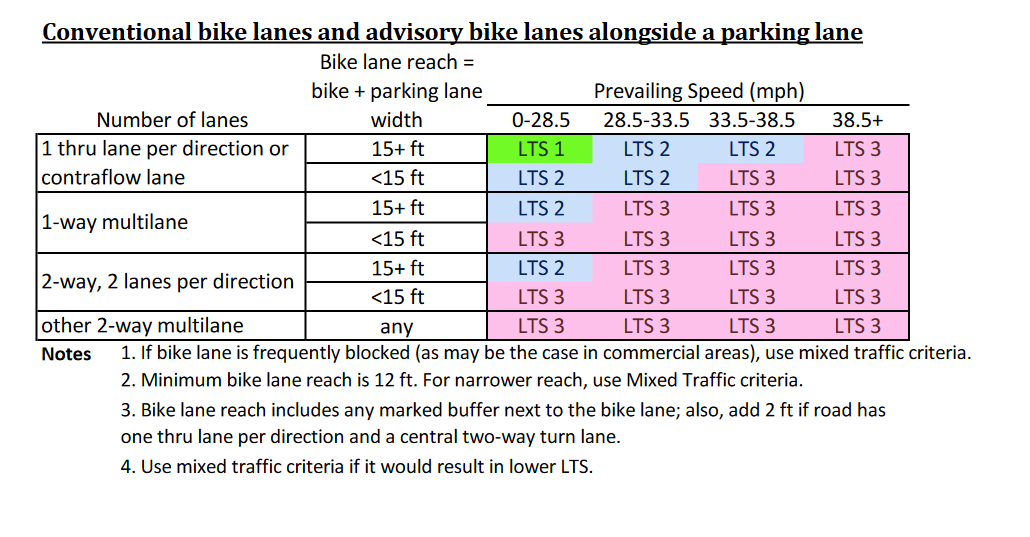

In [6]:
# define the function to calculate the bike lane with parking LTS

def bike_lane_with_parking_LTS(Number_of_lanes, direction, bike_lane_reach_width, speed ):
    if ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width>=15) and (speed<=28.5)):
        return 1
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width>=15) and (speed>28.5) and (speed<=38.5)):
        return 2
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width>=15) and (speed>38.5)):
        return 3
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width<15) and (speed<=33.5)):
        return 2   
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_reach_width<15) and (speed>33.5)):
        return 3 
    
    elif ((Number_of_lanes>1) and (direction==1) and (bike_lane_reach_width>=15) and (speed<=28.5)):
        return 2
    elif ((Number_of_lanes>1) and (direction==1) and (bike_lane_reach_width>=15) and (speed>28.5)):
        return 3
    elif ((Number_of_lanes>1) and (direction==1) and (bike_lane_reach_width<15) and (speed<90)):
        return 3
    
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_reach_width>=15) and (speed<=28.5)):
        return 2
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_reach_width>=15) and (speed>28.5)):
        return 3
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_reach_width<15) and (speed<90)):
        return 3
    elif ((Number_of_lanes>1) and (direction==2) and (bike_lane_reach_width>0) and (speed>=0)):
        return 3
    else:
        return 1
    

In [7]:
# Test the function with dummy variables, make a dummpy pandas dataframe
data1 = {'Number_of_lanes': [1, 2, 3, 4, 5],
        'direction': [1, 1, 2, 2, 2],
        'bike_lane_reach_width':[8, 14, 25, 30, 12],
        'speed':[15, 20, 25, 30, 45]
        }

df1 = pd.DataFrame(data1)
df1

,Number_of_lanes,direction,bike_lane_reach_width,speed
0,1,1,8,15
1,2,1,14,20
2,3,2,25,25
3,4,2,30,30
4,5,2,12,45


In [8]:
# test the algorithm
df1['LTS']=df1.apply(lambda row: bike_lane_with_parking_LTS(row['Number_of_lanes'], row['direction'],row['bike_lane_reach_width'],row['speed']),axis=1)
df1

,Number_of_lanes,direction,bike_lane_reach_width,speed,LTS
0,1,1,8,15,1
1,2,1,14,20,3
2,3,2,25,25,3
3,4,2,30,30,3
4,5,2,12,45,3


# Now lets define bikelane without parking LTS

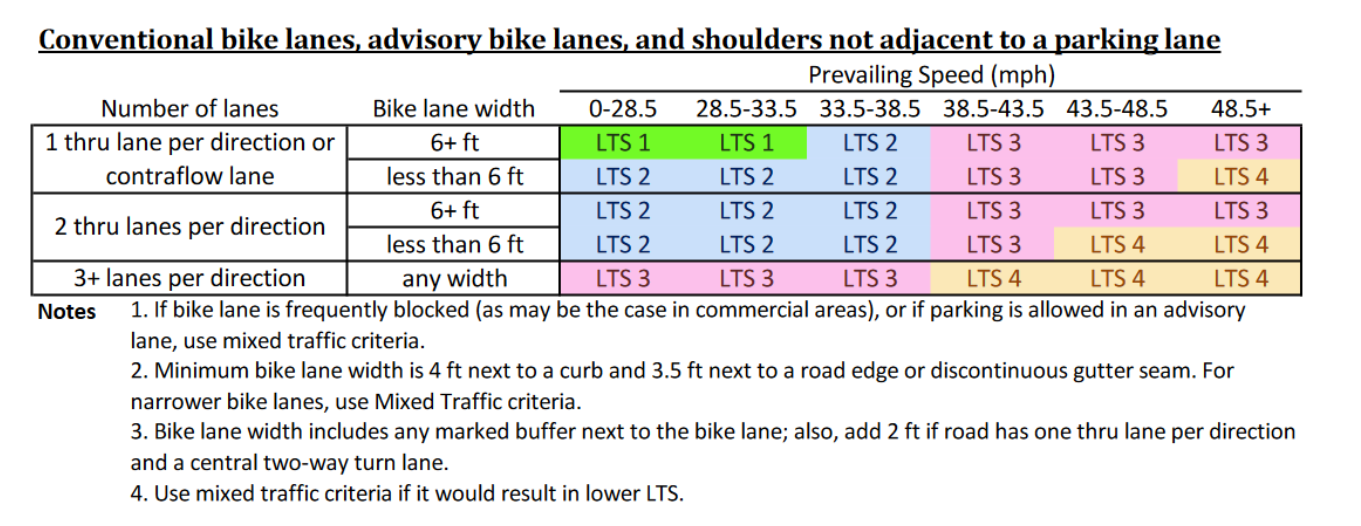

In [9]:
def bike_lane_without_parking_LTS(Number_of_lanes, direction, bike_lane_width, speed ):
    if ((Number_of_lanes==1) and (direction==2) and (bike_lane_width>=6) and (speed<=33.5)):
        return 1
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width>=6) and (speed>33.5) and (speed<=38.5)):
        return 2 
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width>=6) and (speed>38.5)):
        return 3
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width<6) and (speed<=38.5)):
        return 2 
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width<6) and (speed>38.5) and (speed<=48.5)):
        return 3 
    elif ((Number_of_lanes==1) and (direction==2) and (bike_lane_width<6) and (speed>48.5)):
        return 4
    
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width>=6) and (speed<=38.5)):
        return 2
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width>=6) and (speed>38.5)):
        return 3
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width<6) and (speed<=38.5)):
        return 2
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width<6) and (speed>38.5) and (speed<=43.5)):
        return 3
    elif ((Number_of_lanes==2) and (direction==2) and (bike_lane_width<6) and (speed>43.5)):
        return 4
    
    elif ((Number_of_lanes==3) and (direction==2) and (bike_lane_width>0) and (speed<=38.5)):
        return 3
    elif ((Number_of_lanes==3) and (direction==2) and (bike_lane_width>0) and (speed>38.5)):
        return 4
    else:
        return 1

In [10]:
# Test the function with dummy variables, make a dummpy pandas dataframe
data2 = {'Number_of_lanes': [1, 2, 3, 8, 5],
        'direction': [2, 1, 2, 2, 2],
        'bike_lane_width':[8, 6, 8, 10, 12],
        'speed':[40, 20, 25, 30, 45]
        }

df2 = pd.DataFrame(data2)
df2

,Number_of_lanes,direction,bike_lane_width,speed
0,1,2,8,40
1,2,1,6,20
2,3,2,8,25
3,8,2,10,30
4,5,2,12,45


In [11]:
# test the algorithm
df2['LTS']=df2.apply(lambda row: bike_lane_without_parking_LTS(row['Number_of_lanes'], row['direction'],row['bike_lane_width'],row['speed']),axis=1)
df2

,Number_of_lanes,direction,bike_lane_width,speed,LTS
0,1,2,8,40,3
1,2,1,6,20,1
2,3,2,8,25,3
3,8,2,10,30,1
4,5,2,12,45,1


# Calculate LTS for SF auto and bike network

In [12]:
# Now test ffor real network, read motor network for San Francisco
mn=gpd.read_file('H:/mmmiah/Desktop/Bicycle Connectivity Project/SF Validation_data/LTS_data/mixed_traffic_network.json', driver="GeoJSON")
#mn=mn0.to_crs(epsg=7131)
#mn['length_in_mile']=mn['geometry'].length*0.000621371
mn.head()

,unique_id,ending_ele,FID,cnn,street_x,st_type_x,from_st_x,to_st_x,speedlimit,L_mile,...,Shape_Length,Shape_Area,speed,forward_lane_num,backward_lane_num,direction,centerline,length,slope,geometry
0,16,9,16,129000,02ND,ST,MARKET ST,STEVENSON ST,0,0.043812,...,0.001836,9.984372e-08,25,1,1,2,1,70.508916,0.000000,"LINESTRING (-122.40138 37.78927, -122.40081 37..."
1,19,59,19,121000,02ND,AVE,CORNWALL ST,CLEMENT ST,0,0.128947,...,0.004134,2.706863e-07,15,1,1,2,0,207.521292,0.481878,"LINESTRING (-122.46027 37.78501, -122.46014 37..."
2,20,60,20,122000,02ND,AVE,CLEMENT ST,GEARY BLVD,0,0.133327,...,0.004261,2.794707e-07,15,1,1,2,0,214.571476,0.466045,"LINESTRING (-122.46014 37.78314, -122.46000 37..."
3,22,97,22,128000,02ND,AVE,HUGO ST,IRVING ST,0,0.064843,...,0.002273,1.420066e-07,15,1,1,2,0,104.356250,5.749536,"LINESTRING (-122.45888 37.76530, -122.45882 37..."
4,28,63,28,124000,02ND,AVE,ANZA ST,BALBOA ST,0,0.127806,...,0.004101,2.683780e-07,15,1,1,2,0,205.686415,0.486177,"LINESTRING (-122.45986 37.77928, -122.45972 37..."


In [13]:
list(mn.columns)

['unique_id',
 'ending_ele',
 'FID',
 'cnn',
 'street_x',
 'st_type_x',
 'from_st_x',
 'to_st_x',
 'speedlimit',
 'L_mile',
 'street_y',
 'st_type_y',
 'from_st_y',
 'to_st_y',
 'speedlimit_y',
 'ROAD_ID',
 'OSMID',
 'FUNCTIONAL',
 'PATH_ID',
 'ONE_WAY',
 'INTERSECTI',
 'INTERSE_01',
 'WIDTH',
 'FT_BIKE_IN',
 'TF_BIKE_IN',
 'FT_LANES',
 'TF_LANES',
 'FT_PARK',
 'TF_PARK',
 'FT_SEG_STR',
 'longitude',
 'latitude',
 'Field3',
 'AADT',
 'Shape_Length',
 'Shape_Area',
 'speed',
 'forward_lane_num',
 'backward_lane_num',
 'direction',
 'centerline',
 'length',
 'slope',
 'geometry']

In [14]:
# Before claculating the LTS and Connectivity remove the highways
mn1= mn[~mn['street_x'].str.contains("HWY").fillna(False)]
mn2= mn1[~mn1['street_x'].str.contains("I-").fillna(False)]
mn2.shape

(16378, 44)

In [15]:
mn2['FUNCTIONAL'].unique()

array(['tertiary', 'residential', ' ', 'secondary_link', 'path',
       'unclassified', 'secondary', 'primary', 'trunk_link',
       'primary_link', 'tertiary_link', 'living_street', 'motorway_link',
       'trunk', 'motorway'], dtype=object)

In [16]:
# Now Imput the missing AADT
# impute the missing speed limit
# mn2.loc[mn2['AADT']>0].groupby(['FUNCTIONAL'])['AADT'].agg(pd.Series.mode)

In [17]:
# Imput the Traffic volume
#Define function for speed limit imputation
def traffic(FUNCTIONAL):
    if FUNCTIONAL=='living_street':
        return 914
#     elif FUNCTIONAL=='motorway':
#         return 2000
#     elif FUNCTIONAL=='motorway_link':
#         return 2000
    elif FUNCTIONAL=='path':
        return 25632
    elif FUNCTIONAL=='primary':
        return 20802
    elif FUNCTIONAL=='primary_link':
        return 20467
    elif FUNCTIONAL=='residential':
        return 22
    elif FUNCTIONAL=='secondary':
        return 582
    elif FUNCTIONAL=='secondary_link':
        return 21519
    elif FUNCTIONAL=='tertiary':
        return 64
    elif FUNCTIONAL=='tertiary_link':
        return 64
    elif FUNCTIONAL=='trunk':
        return 3919
    elif FUNCTIONAL=='trunk_link':
        return 3919
    elif FUNCTIONAL=='unclassified':
        return 28862
    else:
        return 20000

In [18]:
# mn2_AADT=mn2.loc[mn2['AADT']>0]
# mn2_miss_AADT=mn2.loc[mn2['AADT']<=0]
# mn2_miss_AADT=mn2_miss_AADT.drop(['AADT'],axis=1)
# mn2_miss_AADT['AADT']=mn2_miss_AADT.apply(lambda row:traffic(row['FUNCTIONAL']),axis=1)
# mn3=pd.concat([mn2_AADT,mn2_miss_AADT], axis=0)
# mn3.shape

In [19]:
# drop the path facilities as it is not auto path
mn4=mn2.loc[mn2['FUNCTIONAL']!='path']
mn4.shape

(16189, 44)

In [20]:
mn4['AADT'] = mn4['AADT'].apply(pd.to_numeric, errors='coerce')
mn4.shape

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(16189, 44)

In [21]:
# Calculate LTS for mixed traffic
# test the algorithm
mn4['LTS']=mn4.apply(lambda row: LTS_mixed_traffic(row['AADT'], row['forward_lane_num'], row['centerline'], row['direction'], row['speed']),axis=1)
mn4.head()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,unique_id,ending_ele,FID,cnn,street_x,st_type_x,from_st_x,to_st_x,speedlimit,L_mile,...,Shape_Area,speed,forward_lane_num,backward_lane_num,direction,centerline,length,slope,geometry,LTS
0,16,9,16,129000,02ND,ST,MARKET ST,STEVENSON ST,0,0.043812,...,9.984372e-08,25,1,1,2,1,70.508916,0.000000,"LINESTRING (-122.40138 37.78927, -122.40081 37...",3
1,19,59,19,121000,02ND,AVE,CORNWALL ST,CLEMENT ST,0,0.128947,...,2.706863e-07,15,1,1,2,0,207.521292,0.481878,"LINESTRING (-122.46027 37.78501, -122.46014 37...",1
2,20,60,20,122000,02ND,AVE,CLEMENT ST,GEARY BLVD,0,0.133327,...,2.794707e-07,15,1,1,2,0,214.571476,0.466045,"LINESTRING (-122.46014 37.78314, -122.46000 37...",1
3,22,97,22,128000,02ND,AVE,HUGO ST,IRVING ST,0,0.064843,...,1.420066e-07,15,1,1,2,0,104.356250,5.749536,"LINESTRING (-122.45888 37.76530, -122.45882 37...",1
4,28,63,28,124000,02ND,AVE,ANZA ST,BALBOA ST,0,0.127806,...,2.683780e-07,15,1,1,2,0,205.686415,0.486177,"LINESTRING (-122.45986 37.77928, -122.45972 37...",1


In [22]:
mn4.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
mn4.groupby(['forward_lane_num'])['forward_lane_num'].count()

forward_lane_num
1    13290
2     2077
3      619
4      150
5       53
Name: forward_lane_num, dtype: int64

In [24]:
mn4.groupby(['LTS'])['length'].sum()*0.000621371

LTS
1    704.573310
2    201.076175
3    249.554837
4     42.761442
Name: length, dtype: float64

In [25]:
# calculate total motor path length in mile
mn4['length'].sum()*0.000621371

1197.965763443552

In [26]:
mn4.groupby(['LTS'])['LTS'].count()

LTS
1    9297
2    2952
3    3517
4     423
Name: LTS, dtype: int64

In [27]:
# Calculate LTS for SF Bike network

In [28]:
bn=gpd.read_file("H:/mmmiah/Desktop/Bicycle Connectivity Project/SF Validation_data/LTS_data/bike_network_aug10.json", driver="GeoJSON")
bn=bn.rename(columns={'AADBT':'AADT'})
bn.head()

,unique_id,ending_ele,FID,objectid,cnn_x,streetname_x,from_st_x,to_st_x,facility_t_x,direct_x,...,raised_y,contraflow_y,greenwave_y,biap_y,sm_sweeper_y,L_mile,length,slope,centerline,geometry
0,0,23,0,1,0,,,,CLASS I,2W,...,NO,NO,NO,NO,NO,0.267051,429.780898,4.996694e+08,0,"LINESTRING (-122.50269 37.70797, -122.50214 37..."
1,1,82,1,2,0,,,,CLASS I,2W,...,NO,NO,NO,NO,NO,0.155166,249.717031,4.805439e+00,0,"LINESTRING (-122.51093 37.78270, -122.51077 37..."
2,2,43,3,4,0,,,,CLASS I,2W,...,NO,NO,NO,NO,NO,0.143260,230.555997,3.469873e+00,0,"LINESTRING (-122.50256 37.71871, -122.50258 37..."
3,3,73,4,5,0,,,,CLASS I,2W,...,NO,NO,NO,NO,NO,0.056055,90.213100,0.000000e+00,0,"LINESTRING (-122.44733 37.77189, -122.44736 37..."
4,4,33,5,6,0,,,,CLASS I,2W,...,NO,NO,NO,NO,NO,0.039456,63.499582,2.834664e+01,0,"LINESTRING (-122.50338 37.71286, -122.50266 37..."


In [29]:
# separte the parking lane data
Exclusive_bn=bn.loc[bn['Network_Type']=='Exclusive_Bike_Network']
Exclusive_bn.shape

(165, 128)

In [30]:
# apply LTS formula without parking
# test the algorithm
Exclusive_bn['LTS']=Exclusive_bn.apply(lambda row: bike_lane_without_parking_LTS(row['forward_lane_num'], row['direction'],row['bike_lane_width'],row['speed']),axis=1)
Exclusive_bn.head()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,unique_id,ending_ele,FID,objectid,cnn_x,streetname_x,from_st_x,to_st_x,facility_t_x,direct_x,...,contraflow_y,greenwave_y,biap_y,sm_sweeper_y,L_mile,length,slope,centerline,geometry,LTS
0,0,23,0,1,0,,,,CLASS I,2W,...,NO,NO,NO,NO,0.267051,429.780898,4.996694e+08,0,"LINESTRING (-122.50269 37.70797, -122.50214 37...",1
1,1,82,1,2,0,,,,CLASS I,2W,...,NO,NO,NO,NO,0.155166,249.717031,4.805439e+00,0,"LINESTRING (-122.51093 37.78270, -122.51077 37...",1
2,2,43,3,4,0,,,,CLASS I,2W,...,NO,NO,NO,NO,0.143260,230.555997,3.469873e+00,0,"LINESTRING (-122.50256 37.71871, -122.50258 37...",1
3,3,73,4,5,0,,,,CLASS I,2W,...,NO,NO,NO,NO,0.056055,90.213100,0.000000e+00,0,"LINESTRING (-122.44733 37.77189, -122.44736 37...",1
4,4,33,5,6,0,,,,CLASS I,2W,...,NO,NO,NO,NO,0.039456,63.499582,2.834664e+01,0,"LINESTRING (-122.50338 37.71286, -122.50266 37...",1


In [31]:
Exclusive_bn.groupby(['LTS'])['LTS'].count()

LTS
1    148
2     12
3      5
Name: LTS, dtype: int64

In [32]:
bike_mixed=bn.loc[bn['Network_Type']=='Bike_Traffic_Mixed_Network']
bike_mixed.shape

(5243, 128)

In [33]:
bike_mixed['AADT'] = bike_mixed['AADT'].apply(pd.to_numeric, errors='coerce')
bike_mixed.shape

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(5243, 128)

In [34]:
bike_mixed['LTS']=bike_mixed.apply(lambda row: LTS_mixed_traffic(row['AADT'], row['forward_lane_num'], row['centerline'], row['direction'], row['speed']),axis=1)
bike_mixed.head()

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,unique_id,ending_ele,FID,objectid,cnn_x,streetname_x,from_st_x,to_st_x,facility_t_x,direct_x,...,contraflow_y,greenwave_y,biap_y,sm_sweeper_y,L_mile,length,slope,centerline,geometry,LTS
19,19,55,58,59,19866002,,,,CLASS III,2W,...,NO,NO,NO,NO,0.051821,83.398097,2.398136,0,"LINESTRING (-122.47602 37.80690, -122.47539 37...",2
20,20,55,59,60,19866002,,,,CLASS III,2W,...,NO,NO,NO,NO,0.051821,83.398097,2.398136,0,"LINESTRING (-122.47602 37.80690, -122.47539 37...",2
21,21,49,60,61,19789000,,UNNAMED 078,UNNAMED 052,CLASS III,2W,...,NO,NO,NO,NO,0.087873,141.418771,3.535599,0,"LINESTRING (-122.47513 37.80741, -122.47497 37...",1
22,22,49,61,62,19789000,,UNNAMED 078,UNNAMED 052,CLASS III,2W,...,NO,NO,NO,NO,0.087873,141.418771,3.535599,0,"LINESTRING (-122.47513 37.80741, -122.47497 37...",1
44,44,3,95,96,8707101,,,,CLASS I,2W,...,NO,NO,NO,NO,0.547208,880.653550,0.000000,0,"LINESTRING (-122.43748 37.80653, -122.44735 37...",2


In [35]:
bike_mixed.groupby(['LTS'])['LTS'].count()

LTS
1    1886
2    1250
3    1926
4     181
Name: LTS, dtype: int64

# Now calculate the connectivity algorithm weights

In [36]:
list(mn4)

['unique_id',
 'ending_ele',
 'FID',
 'cnn',
 'street_x',
 'st_type_x',
 'from_st_x',
 'to_st_x',
 'speedlimit',
 'L_mile',
 'street_y',
 'st_type_y',
 'from_st_y',
 'to_st_y',
 'speedlimit_y',
 'ROAD_ID',
 'OSMID',
 'FUNCTIONAL',
 'PATH_ID',
 'ONE_WAY',
 'INTERSECTI',
 'INTERSE_01',
 'WIDTH',
 'FT_BIKE_IN',
 'TF_BIKE_IN',
 'FT_LANES',
 'TF_LANES',
 'FT_PARK',
 'TF_PARK',
 'FT_SEG_STR',
 'longitude',
 'latitude',
 'Field3',
 'AADT',
 'Shape_Length',
 'Shape_Area',
 'speed',
 'forward_lane_num',
 'backward_lane_num',
 'direction',
 'centerline',
 'length',
 'slope',
 'geometry',
 'LTS']

In [37]:
motor_network=mn4[['cnn','LTS', 'slope','length','geometry']]
motor_network=gpd.GeoDataFrame(motor_network, crs="EPSG:4326", geometry='geometry')
motor_network

,cnn,LTS,slope,length,geometry
0,129000,3,0.000000,70.508916,"LINESTRING (-122.40138 37.78927, -122.40081 37..."
1,121000,1,0.481878,207.521292,"LINESTRING (-122.46027 37.78501, -122.46014 37..."
2,122000,1,0.466045,214.571476,"LINESTRING (-122.46014 37.78314, -122.46000 37..."
3,128000,1,5.749536,104.356250,"LINESTRING (-122.45888 37.76530, -122.45882 37..."
4,124000,1,0.486177,205.686415,"LINESTRING (-122.45986 37.77928, -122.45972 37..."
...,...,...,...,...,...
16567,13620000,3,6.294880,79.429626,"LINESTRING (-122.44838 37.71037, -122.44802 37..."
16568,13620000,3,6.294880,79.429626,"LINESTRING (-122.44838 37.71037, -122.44802 37..."
16569,13684000,3,4.956770,60.523284,"LINESTRING (-122.47424 37.72689, -122.47465 37..."
16570,13689000,1,4.159037,528.968632,"LINESTRING (-122.47870 37.72821, -122.47927 37..."


In [38]:
bike_network0=pd.concat([Exclusive_bn,bike_mixed],axis=0)
bike_network=bike_network0[['cnn_x','LTS', 'slope','length','geometry']]
bike_network=bike_network.rename(columns={'cnn_x':'cnn'})
bike_network=gpd.GeoDataFrame(bike_network, crs="EPSG:4326", geometry='geometry')
bike_network.head()

,cnn,LTS,slope,length,geometry
0,0,1,4.996694e+08,429.780898,"LINESTRING (-122.50269 37.70797, -122.50214 37..."
1,0,1,4.805439e+00,249.717031,"LINESTRING (-122.51093 37.78270, -122.51077 37..."
2,0,1,3.469873e+00,230.555997,"LINESTRING (-122.50256 37.71871, -122.50258 37..."
3,0,1,0.000000e+00,90.213100,"LINESTRING (-122.44733 37.77189, -122.44736 37..."
4,0,1,2.834664e+01,63.499582,"LINESTRING (-122.50338 37.71286, -122.50266 37..."


In [39]:
bike_network.groupby(['LTS'])['length'].sum()*0.000621371

LTS
1    192.500220
2    105.452505
3    152.042827
4     16.693344
Name: length, dtype: float64

In [40]:
bike_network['length'].sum()*0.000621371

466.68889594546323

In [41]:
bike_network.shape

(5408, 5)

In [42]:
# write a slope impedance function
def slope_correction(length,LTS,slope):
    if slope <=2:
        return length*(1+LTS)
    elif ((slope>2) and (slope<=4)):
        return length*(1+0.37+LTS)
    elif ((slope>4) and (slope<=6)):
        return length*(1+1.20+LTS)
    else:
        return length*(1+3.20+LTS)

In [43]:
motor_network['impedance_of_link']=motor_network.apply(lambda row: slope_correction(row['length'],row['LTS'],row['slope']),axis=1)
motor_network.head(8)

,cnn,LTS,slope,length,geometry,impedance_of_link
0,129000,3,0.000000,70.508916,"LINESTRING (-122.40138 37.78927, -122.40081 37...",282.035662
1,121000,1,0.481878,207.521292,"LINESTRING (-122.46027 37.78501, -122.46014 37...",415.042583
2,122000,1,0.466045,214.571476,"LINESTRING (-122.46014 37.78314, -122.46000 37...",429.142953
3,128000,1,5.749536,104.356250,"LINESTRING (-122.45888 37.76530, -122.45882 37...",333.939999
4,124000,1,0.486177,205.686415,"LINESTRING (-122.45986 37.77928, -122.45972 37...",411.372830
5,123000,1,0.932091,214.571424,"LINESTRING (-122.46000 37.78121, -122.45986 37...",429.142849
6,119000,1,1.355921,147.501201,"LINESTRING (-122.46040 37.78686, -122.46031 37...",295.002401
7,118000,1,7.003256,42.837216,"LINESTRING (-122.46043 37.78725, -122.46040 37...",222.753524


In [44]:
bike_network['impedance_of_link']=bike_network.apply(lambda row: slope_correction(row['length'],row['LTS'],row['slope']),axis=1)
bike_network.head(8)

,cnn,LTS,slope,length,geometry,impedance_of_link
0,0,1,4.996694e+08,429.780898,"LINESTRING (-122.50269 37.70797, -122.50214 37...",2234.860667
1,0,1,4.805439e+00,249.717031,"LINESTRING (-122.51093 37.78270, -122.51077 37...",799.094500
2,0,1,3.469873e+00,230.555997,"LINESTRING (-122.50256 37.71871, -122.50258 37...",546.417712
3,0,1,0.000000e+00,90.213100,"LINESTRING (-122.44733 37.77189, -122.44736 37...",180.426199
4,0,1,2.834664e+01,63.499582,"LINESTRING (-122.50338 37.71286, -122.50266 37...",330.197826
5,0,1,3.481439e+00,57.447514,"LINESTRING (-122.47826 37.76591, -122.47832 37...",136.150607
6,0,1,1.071302e+01,289.367486,"LINESTRING (-122.49948 37.71249, -122.50004 37...",1504.710929
7,0,1,3.019814e+00,264.916973,"LINESTRING (-122.50010 37.71808, -122.50012 37...",627.853225


In [45]:
check=pd.merge(motor_network,bike_network,on=['geometry'],how='inner')
check.shape

(4168, 11)

In [51]:
bike_network.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Now lets calculate the connectivity score

In [46]:
def node_level_connectivity_score (sf_motor_network,sf_bike_network):
    connectivity_score=[]
    sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
    sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    motor_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_motor_g1,cutoff=39590, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_sheortst_path_motor_length=pd.DataFrame.from_dict(motor_length)
    # Calculate the total motor path
    sf_sheortst_path_motor_length['total_motor_path']=sf_sheortst_path_motor_length.sum(numeric_only=True, axis=0)
    sf_sheortst_path_motor_length1=sf_sheortst_path_motor_length[['total_motor_path']]
    # make total motor path as dictonary
    ms_outcomes=sf_sheortst_path_motor_length1.T.to_dict('list')
    # add motor path attribute with grpah nodes
    nx.set_node_attributes(sf_lts_motor_g1, values=ms_outcomes, name="total_motor_path")
    nodes_motor, edges_motor = momepy.nx_to_gdf(sf_lts_motor_g1)
    nodes_motor['total_motor_path'] = nodes_motor['total_motor_path'].str[0]
    
    
    # do it for bike Path
    sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)
    sf_lts_bike_g1 =momepy.gdf_to_nx(sf_lts_bike_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    bike_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_bike_g1,cutoff=39590, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_shortest_path_bike_length=pd.DataFrame.from_dict(bike_length)
    # Calculate the total bike path
    sf_shortest_path_bike_length['total_bike_path']=sf_shortest_path_bike_length.sum(numeric_only=True, axis=0)
    sf_shortest_path_bike_length1=sf_shortest_path_bike_length[['total_bike_path']]
    # make total motor path as dictonary
    bs_outcomes=sf_shortest_path_bike_length1.T.to_dict('list')
    # add motor path attribute with grpah nodes
    nx.set_node_attributes(sf_lts_bike_g1, values=bs_outcomes, name="total_bike_path")
    nodes_bike, edges_bike = momepy.nx_to_gdf(sf_lts_bike_g1)
    nodes_bike['total_bike_path'] = nodes_bike['total_bike_path'].str[0]

    #connectivity score
    shortest_path=pd.merge(nodes_motor,nodes_bike,on=['geometry'],how='outer')
    shortest_path1=shortest_path.fillna(0)
    shortest_path1['CS']= shortest_path1['total_bike_path']/shortest_path1['total_motor_path']
    shortest_path1= shortest_path1.replace(np.inf, 999)
    return shortest_path1 


In [47]:
# define grade of connectivity
def count_census_block(Connectivity_score):
    if Connectivity_score>=1:
        return 'excellently connected'
    elif (Connectivity_score>=0.90 and Connectivity_score<1.0):
        return 'very well connected  '
    elif (Connectivity_score>=0.60 and Connectivity_score<0.90):
        return 'well connected'
    elif (Connectivity_score>=0.30 and Connectivity_score<0.60):
        return 'fairly connected'
    else:
        return 'poorly connected'

In [48]:
def census_node_level_connectivity_score (sf_connectivity,input_census_tract):
    census_score=gpd.sjoin(sf_connectivity,input_census_tract)
    census_score1=pd.DataFrame({'Meadian CS':census_score.groupby(['GISJOIN'])['CS'].median()}).reset_index()
    census_score2=pd.merge(census_score1,input_census_tract, on=['GISJOIN'], how='inner' )
    return census_score2 

# Select the Transit stops you want to evaluate

In [319]:
# Import the transit stops shape file
ts=gpd.read_file('H:/mmmiah/Desktop/Bicycle Connectivity Project/FMLM_Analysis/SF_transit_stops.json',driver='GeoJSON')
ts1=ts.to_crs(epsg=7131)
# Creat the 3 miles buffer around the each transit stations/stops
ts1['geometry'] = ts1['geometry'].buffer(100)
ts1['buffer_area']=ts1.area*3.86102e-7 # square mile
# drop the duplicate station
ts1=ts1.drop_duplicates(subset=['stop_name'], keep='first')
ts1.head()

,FID,OBJECTID,agency,route_id,route_type,stop_id,stop_name,base64_url,uri,feed_url,geometry,buffer_area
0,0,525,Amtrak,37329,3,SFC,San Francisco,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,https://content.amtrak.com/content/gtfs/GTFS.zip,"POLYGON ((52604.028 28291.107, 52603.546 28281...",0.01211
1,1,9754,AC Transit,701,3,50031,Salesforce Transit Center Bay 31,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZW...,https://api.511.org/transit/datafeeds?api_key=...,https://api.511.org/transit/datafeeds?operator...,"POLYGON ((52876.907 28454.310, 52876.426 28444...",0.01211
2,2,9756,AC Transit,702,3,50033,Salesforce Transit Center Bay 33,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZW...,https://api.511.org/transit/datafeeds?api_key=...,https://api.511.org/transit/datafeeds?operator...,"POLYGON ((52890.024 28467.415, 52889.542 28457...",0.01211
3,3,9758,AC Transit,703,3,50035,Salesforce Transit Center Bay 35,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZW...,https://api.511.org/transit/datafeeds?api_key=...,https://api.511.org/transit/datafeeds?operator...,"POLYGON ((52903.229 28480.630, 52902.747 28470...",0.01211
6,6,10681,AC Transit,800,3,50489,Market St & Gough St,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZW...,https://api.511.org/transit/datafeeds?api_key=...,https://api.511.org/transit/datafeeds?operator...,"POLYGON ((50571.563 26534.224, 50571.081 26524...",0.01211


In [320]:
ts1.shape

(2360, 12)

In [236]:
#ts2=ts1.to_crs(epsg=4326)
#ts2.head()

In [237]:
# check the agency who run the transit
#ts2.groupby(['agency'])['stop_name'].count()

In [214]:
#ts2['stop_name'].nunique()

In [196]:
# Lets evaluate the transit stops connectivity by agency, We will Evalaute major Transit stations operated by Muni, Golden gate Transitm SamTrans and others that have at least more than 10 stops

In [197]:
# Lets calculcate the connectivity for BART Stations

# Calculate the Connectivity score using BNC Algorithms

In [150]:
motor_network=motor_network.to_crs(epsg=7131)
bike_network=bike_network.to_crs(epsg=7131)

In [191]:
crs = {'init': 'epsg:7131'}
bn = gpd.GeoDataFrame(bike_network, crs=crs, geometry = 'geometry')
bn.to_file("SF_BN.json", driver="GeoJSON")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [192]:
crs = {'init': 'epsg:7131'}
an = gpd.GeoDataFrame(motor_network, crs=crs, geometry = 'geometry')
an.to_file("SF_AN.json", driver="GeoJSON")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [151]:
sf_connectivity=node_level_connectivity_score (motor_network,bike_network)
sf_connectivity.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20224\4200728652.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20224\4200728652.py:21: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)


,total_motor_path,nodeID_x,geometry,total_bike_path,nodeID_y,CS
0,1.872304e+08,0.0,POINT (52283.076 28359.250),4.703794e+07,351.0,0.25123
1,1.876220e+08,1.0,POINT (52332.870 28309.329),4.688866e+07,350.0,0.24991
2,1.862839e+08,2.0,POINT (47095.680 27885.577),0.000000e+00,0.0,0.00000
3,1.845113e+08,3.0,POINT (47106.756 27678.351),0.000000e+00,0.0,0.00000
4,1.827191e+08,4.0,POINT (47119.066 27464.133),0.000000e+00,0.0,0.00000


In [215]:
sf_connectivity.shape

(9571, 6)

In [367]:
sf_ts=gpd.clip(sf_connectivity,ts1)
sf_ts1=gpd.sjoin(sf_ts, ts1,how='inner')
#sf_bart_ts=sf_ts.loc[sf_ts['agency']=='BART']
sf_ts2=pd.DataFrame({'bike_path_sum': sf_ts1.groupby(['stop_name'])['total_bike_path'].sum()}).reset_index()
sf_ts3=pd.DataFrame({'auto_path_sum': sf_ts1.groupby(['stop_name'])['total_motor_path'].sum()}).reset_index()
sf_ts4=pd.merge(sf_ts2,sf_ts3, on=['stop_name'], how='inner')
sf_ts4.head()

,stop_name,bike_path_sum,auto_path_sum
0,100 Hooper (Adobe),4.736915e+07,1.712596e+08
1,100 O'Shaughnessy Blvd,0.000000e+00,1.789007e+08
2,10th Ave & Ortega St,0.000000e+00,3.847941e+08
3,10th Ave & Pacheco St,0.000000e+00,5.858769e+08
4,10th Ave & Quintara St,0.000000e+00,3.975999e+08


In [368]:
sf_ts4.shape, ts1.shape,sf_ts.shape

((2321, 3), (2360, 12), (4695, 6))

In [369]:
# Calculate the connectivity for each stops
sf_ts4['SF_Stops_BNC']=sf_ts4['bike_path_sum']/sf_ts4['auto_path_sum']
sf_ts4.head()

,stop_name,bike_path_sum,auto_path_sum,SF_Stops_BNC
0,100 Hooper (Adobe),4.736915e+07,1.712596e+08,0.276593
1,100 O'Shaughnessy Blvd,0.000000e+00,1.789007e+08,0.000000
2,10th Ave & Ortega St,0.000000e+00,3.847941e+08,0.000000
3,10th Ave & Pacheco St,0.000000e+00,5.858769e+08,0.000000
4,10th Ave & Quintara St,0.000000e+00,3.975999e+08,0.000000


In [371]:
# replace all infinite with 1 score
sf_ts4.replace([np.inf, -np.inf], 1, inplace=True)
sf_ts4['SF_Stops_BNC']=np.where(sf_ts4['SF_Stops_BNC']>1, 1, sf_ts4['SF_Stops_BNC'])
sf_ts4.head()

,stop_name,bike_path_sum,auto_path_sum,SF_Stops_BNC
0,100 Hooper (Adobe),4.736915e+07,1.712596e+08,0.276593
1,100 O'Shaughnessy Blvd,0.000000e+00,1.789007e+08,0.000000
2,10th Ave & Ortega St,0.000000e+00,3.847941e+08,0.000000
3,10th Ave & Pacheco St,0.000000e+00,5.858769e+08,0.000000
4,10th Ave & Quintara St,0.000000e+00,3.975999e+08,0.000000


In [372]:
sf_ts4['SF_Stops_BNC'].describe()

count    2321.000000
mean        0.099885
std         0.129957
min         0.000000
25%         0.000000
50%         0.058715
75%         0.170631
max         1.000000
Name: SF_Stops_BNC, dtype: float64

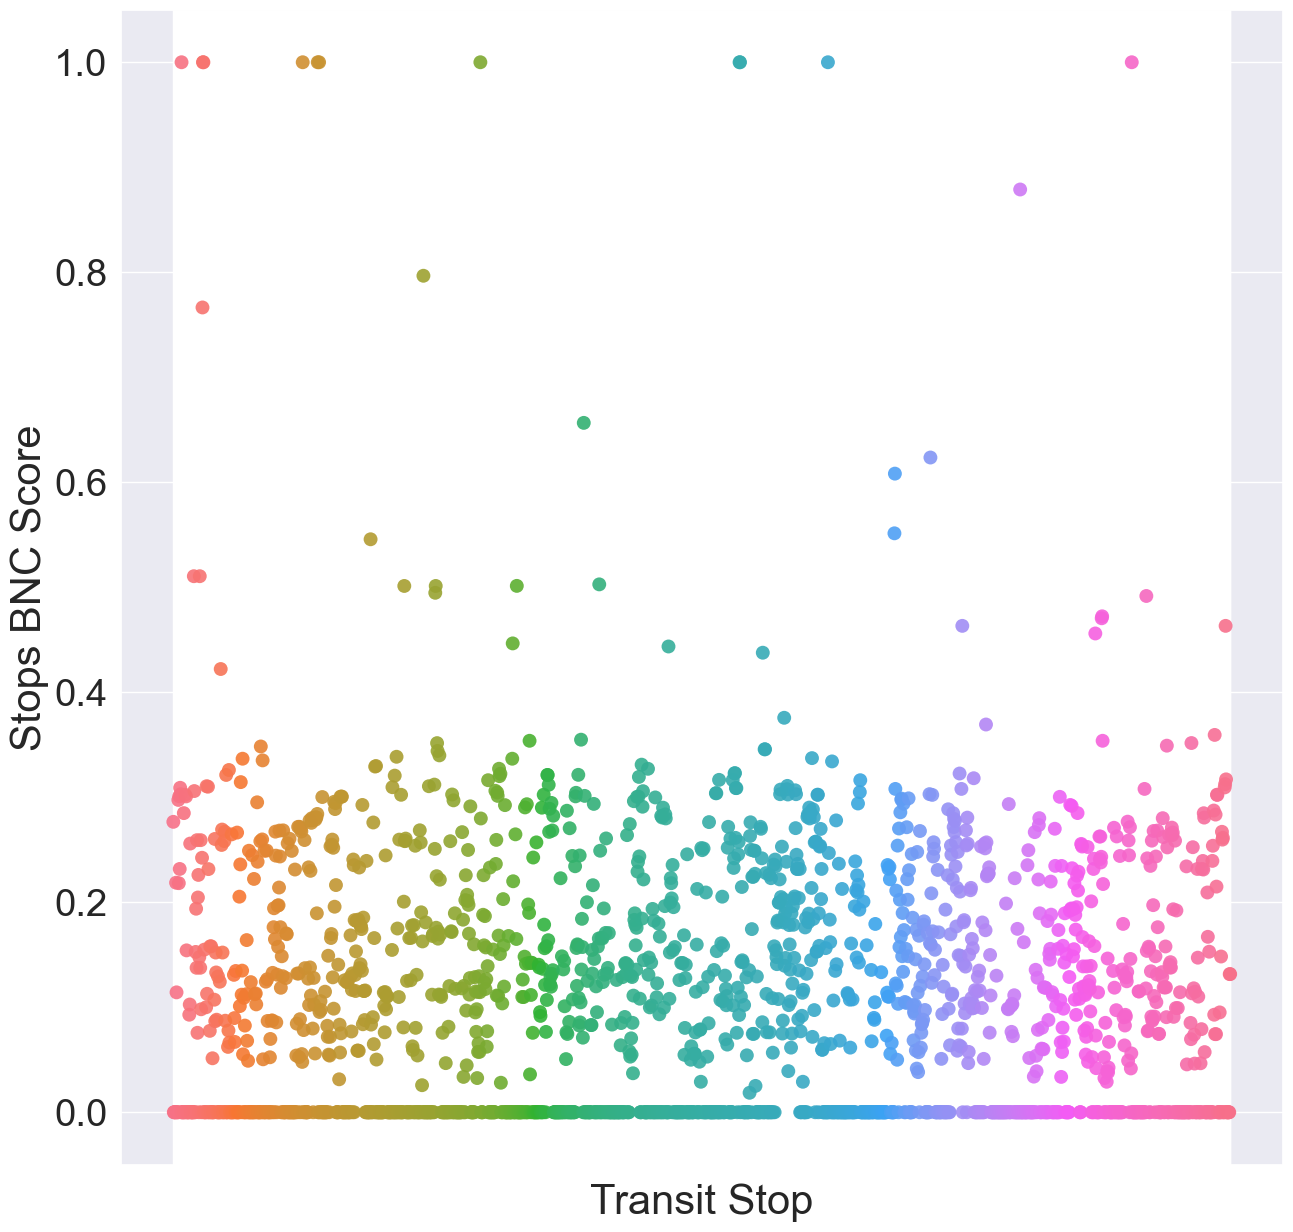

In [373]:
sns.set(font_scale=2.5)
plt.figure(figsize=(15,15))
sns.scatterplot(edgecolor="none")
g=sns.scatterplot(data=sf_ts4, x='stop_name', y="SF_Stops_BNC", hue="stop_name",legend=False, s=100,linewidth=0, alpha = 0.9)
g.set(xticklabels=[])
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Transit Stop')
# Set y-axis label
plt.ylabel('Stops BNC Score')
plt.show()

In [374]:
# overall Transit stops connectivity 
all_stops_BNC=sf_ts4['SF_Stops_BNC'].mean()
all_stops_BNC

0.09988519918972494

In [375]:
# add the transit stops geometry
tss=ts.to_crs(epsg=7131)
tss1=tss.drop(['FID', 'OBJECTID', 'agency', 'route_id', 'route_type', 'stop_id','base64_url', 'uri', 'feed_url'], axis=1)
tss1=tss1.drop_duplicates(subset=['stop_name'], keep='first')
sf_ts5=pd.merge(sf_ts4,tss1, on=['stop_name'], how='outer' )
sf_ts5.head()

,stop_name,bike_path_sum,auto_path_sum,SF_Stops_BNC,geometry
0,100 Hooper (Adobe),4.736915e+07,1.712596e+08,0.276593,POINT (52496.683 26057.762)
1,100 O'Shaughnessy Blvd,0.000000e+00,1.789007e+08,0.000000,POINT (47940.243 23387.433)
2,10th Ave & Ortega St,0.000000e+00,3.847941e+08,0.000000,POINT (46545.725 24302.472)
3,10th Ave & Pacheco St,0.000000e+00,5.858769e+08,0.000000,POINT (46556.793 24095.580)
4,10th Ave & Quintara St,0.000000e+00,3.975999e+08,0.000000,POINT (46566.898 23925.204)


In [376]:
sf_ts5.shape

(2360, 5)

In [377]:
# save the SF Transit Stops BNC score
sf_ts5.to_csv('SF_transit_stops_BNC_Score.csv')
crs = {'init': 'epsg:7131'}
ts6 = gpd.GeoDataFrame(sf_ts5, crs=crs, geometry = 'geometry')
ts6.to_file("SF_Transit Stops_BNC_Score.json", driver="GeoJSON")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# Calculate the Connectivity score using LSN Algorithm

In [258]:
sf_low_stress_network=motor_network.loc[motor_network['LTS']<3]

In [190]:
# save the Low Stress Network
# save this mixed traffic network file
crs = {'init': 'epsg:7131'}
lsn = gpd.GeoDataFrame(sf_low_stress_network, crs=crs, geometry = 'geometry')
lsn.to_file("SF_LSN.json", driver="GeoJSON")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [170]:
sf_low_stress_network.groupby(['LTS'])['length'].sum()*0.000621371

LTS
1    704.573310
2    201.076175
Name: length, dtype: float64

In [171]:
sf_low_stress_network['length'].sum()*0.000621371

905.6494850148085

In [172]:
sf_node_level_LSN_CS= node_level_connectivity_score(motor_network,sf_low_stress_network)
sf_node_level_LSN_CS.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20224\4200728652.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_20224\4200728652.py:21: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)


,total_motor_path,nodeID_x,geometry,total_bike_path,nodeID_y,CS
0,1.872304e+08,0,POINT (52283.076 28359.250),1.341926e+08,7578.0,0.716724
1,1.876220e+08,1,POINT (52332.870 28309.329),4.858456e+03,7851.0,0.000026
2,1.862839e+08,2,POINT (47095.680 27885.577),1.391283e+08,0.0,0.746862
3,1.845113e+08,3,POINT (47106.756 27678.351),1.391865e+08,1.0,0.754352
4,1.827191e+08,4,POINT (47119.066 27464.133),1.397193e+08,2.0,0.764667


In [385]:
sf_lsts=gpd.clip(sf_node_level_LSN_CS,ts1)
sf_lsts1=gpd.sjoin(sf_lsts, ts1,how='inner')
#sf_bart_ts=sf_ts.loc[sf_ts['agency']=='BART']
sf_lsts2=pd.DataFrame({'bike_path_sum': sf_lsts1.groupby(['stop_name'])['total_bike_path'].sum()}).reset_index()
sf_lsts3=pd.DataFrame({'auto_path_sum': sf_lsts1.groupby(['stop_name'])['total_motor_path'].sum()}).reset_index()
sf_lsts4=pd.merge(sf_lsts2,sf_lsts3, on=['stop_name'], how='inner')
sf_lsts4.head()

,stop_name,bike_path_sum,auto_path_sum
0,100 Hooper (Adobe),1.300652e+08,1.712596e+08
1,100 O'Shaughnessy Blvd,1.113046e+08,1.789007e+08
2,10th Ave & Ortega St,3.043151e+08,3.847941e+08
3,10th Ave & Pacheco St,4.607929e+08,5.858769e+08
4,10th Ave & Quintara St,3.094447e+08,3.975999e+08


In [386]:
sf_lsts.head()

,total_motor_path,nodeID_x,geometry,total_bike_path,nodeID_y,CS
6225,1.980825e+08,6225,POINT (46329.872 19360.920),82843.626715,5877.0,0.000418
6828,1.899683e+08,6828,POINT (46321.935 19360.921),18581.648441,6454.0,0.000098
2182,1.898078e+08,2182,POINT (46300.783 19411.760),14149.597229,2030.0,0.000075
2183,1.898253e+08,2183,POINT (46201.140 19413.446),20886.386241,2031.0,0.000110
6224,2.002132e+08,6224,POINT (46393.730 19442.264),67641.557977,5876.0,0.000338


In [387]:
sf_lsts4.shape

(2312, 3)

In [388]:
# Calculate the connectivity for each stops
sf_lsts4['SF_Stops_LSNC']=sf_lsts4['bike_path_sum']/sf_lsts4['auto_path_sum']
sf_lsts4.head()

,stop_name,bike_path_sum,auto_path_sum,SF_Stops_LSNC
0,100 Hooper (Adobe),1.300652e+08,1.712596e+08,0.759462
1,100 O'Shaughnessy Blvd,1.113046e+08,1.789007e+08,0.622159
2,10th Ave & Ortega St,3.043151e+08,3.847941e+08,0.790852
3,10th Ave & Pacheco St,4.607929e+08,5.858769e+08,0.786501
4,10th Ave & Quintara St,3.094447e+08,3.975999e+08,0.778282


In [389]:
# replace all infinite with 1 score
sf_lsts4.replace([np.inf, -np.inf], 1, inplace=True)
sf_lsts4['SF_Stops_LSNC']=np.where(sf_lsts4['SF_Stops_LSNC']>1, 1, sf_lsts4['SF_Stops_LSNC'])
sf_lsts4.head()

,stop_name,bike_path_sum,auto_path_sum,SF_Stops_LSNC
0,100 Hooper (Adobe),1.300652e+08,1.712596e+08,0.759462
1,100 O'Shaughnessy Blvd,1.113046e+08,1.789007e+08,0.622159
2,10th Ave & Ortega St,3.043151e+08,3.847941e+08,0.790852
3,10th Ave & Pacheco St,4.607929e+08,5.858769e+08,0.786501
4,10th Ave & Quintara St,3.094447e+08,3.975999e+08,0.778282


In [390]:
sf_lsts4['SF_Stops_LSNC'].describe()

count    2312.000000
mean        0.496948
std         0.299698
min         0.000000
25%         0.271278
50%         0.574967
75%         0.754208
max         1.000000
Name: SF_Stops_LSNC, dtype: float64

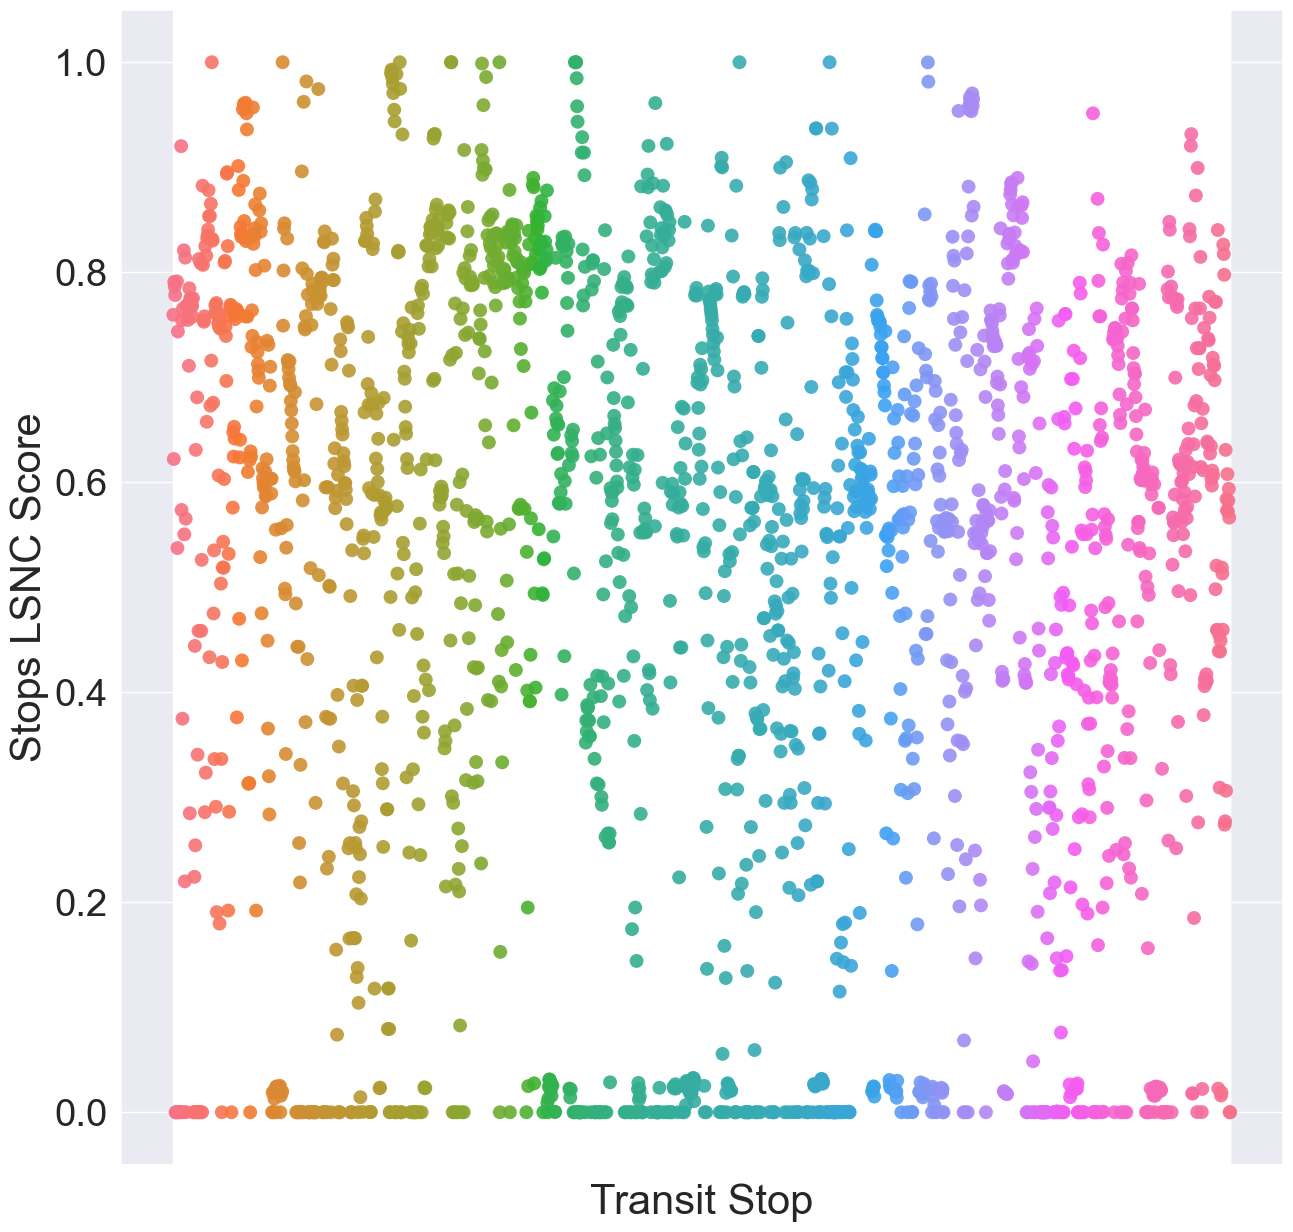

In [391]:
sns.set(font_scale=2.5)
plt.figure(figsize=(15,15))
sns.scatterplot(edgecolor="none")
g=sns.scatterplot(data=sf_lsts4, x='stop_name', y="SF_Stops_LSNC", hue="stop_name",legend=False, s=100,linewidth=0, alpha = 0.9)
g.set(xticklabels=[])
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Transit Stop')
# Set y-axis label
plt.ylabel('Stops LSNC Score')
plt.show()

In [392]:
# overall Transit stops connectivity 
all_stops_LSNC=sf_lsts4['SF_Stops_LSNC'].mean()
all_stops_LSNC

0.4969482026813937

In [393]:
sf_lsts4.shape

(2312, 4)

In [394]:
# add the transit stops geometry
tss=ts.to_crs(epsg=7131)
tss1=tss.drop(['FID', 'OBJECTID', 'agency', 'route_id', 'route_type', 'stop_id','base64_url', 'uri', 'feed_url'], axis=1)
tss1=tss1.drop_duplicates(subset=['stop_name'], keep='first')
sf_lsts5=pd.merge(sf_lsts4,tss1, on=['stop_name'], how='outer' )
sf_lsts5.head()

,stop_name,bike_path_sum,auto_path_sum,SF_Stops_LSNC,geometry
0,100 Hooper (Adobe),1.300652e+08,1.712596e+08,0.759462,POINT (52496.683 26057.762)
1,100 O'Shaughnessy Blvd,1.113046e+08,1.789007e+08,0.622159,POINT (47940.243 23387.433)
2,10th Ave & Ortega St,3.043151e+08,3.847941e+08,0.790852,POINT (46545.725 24302.472)
3,10th Ave & Pacheco St,4.607929e+08,5.858769e+08,0.786501,POINT (46556.793 24095.580)
4,10th Ave & Quintara St,3.094447e+08,3.975999e+08,0.778282,POINT (46566.898 23925.204)


In [395]:
sf_lsts5.shape

(2360, 5)

In [396]:
# save the SF Transit Stops BNC score
sf_lsts5.to_csv('SF_transit_stops_LSNC_Score.csv')
crs = {'init': 'epsg:7131'}
lsts6 = gpd.GeoDataFrame(sf_lsts5, crs=crs, geometry = 'geometry')
lsts6.to_file("SF_Transit Stops_LSNC_Score.json", driver="GeoJSON")

C:\Users\mmmiah\Anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [397]:
# merge these two score together
bnc=sf_ts5[['stop_name','SF_Stops_BNC']]
lsnc=sf_lsts5[['stop_name','SF_Stops_LSNC']]
nc=pd.merge(bnc,lsnc, on=['stop_name'], how='inner')
nc.to_csv('SF_Transit_Stops_BNC_LSNC_Score.csv')

# End of the Evaluation